# Linearity, Correlation, and Hypothesis Testing

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from scipy import stats

In [7]:
df = pd.read_csv('day.csv')
df.shape

(731, 16)

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df = df[['season', 'temp','hum','windspeed','cnt']]
df.head()

,season,temp,hum,windspeed,cnt
0,1,0.344167,0.805833,0.160446,985
1,1,0.363478,0.696087,0.248539,801
2,1,0.196364,0.437273,0.248309,1349
3,1,0.200000,0.590435,0.160296,1562
4,1,0.226957,0.436957,0.186900,1600


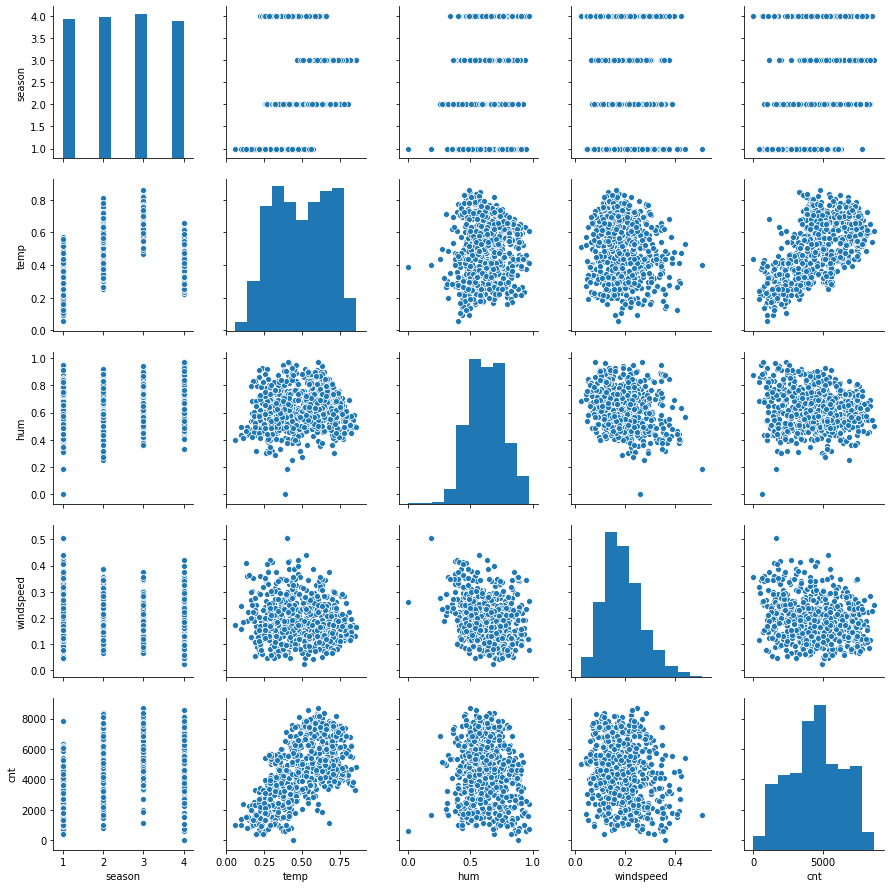

In [10]:
sns.pairplot(df)

In [13]:
# Apply the corr() function to the dataframe
print(df.corr()['windspeed'])

season      -0.229046
temp        -0.157944
hum         -0.248489
windspeed    1.000000
cnt         -0.234545
Name: windspeed, dtype: float64


In [14]:
df.groupby(by = 'season').mean()['cnt']

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [20]:
# T-test between fall and summer
# T-test: compare the means of two different populations
# H0: mu_0 = mu_1, reject H0 if p-value < alpha (0.05)
fall = df[df.season == 3].cnt.values
summer = df[df.season == 2].cnt.values
cnt_comp_fall_summer = stats.ttest_ind(fall, summer)
cnt_comp_fall_summer.pvalue

8.411509811510022e-05

In [25]:
## Standarlisition
df['stand_temp'] = (df.temp - np.mean(df.temp))/np.std(df.temp)
df['stand_hum'] = (df.hum - np.mean(df.hum))/np.std(df.hum)
df['stand_windspeed'] = (df.windspeed - np.mean(df.windspeed))/np.std(df.windspeed)
# Kolmogorov-Smirnov test: goodness of fit, two distributions are ==
# reject if p-value < alpha
# normality test
kstest_temp = stats.kstest(df.stand_temp, 'norm')
kstest_hum = stats.kstest(df.stand_hum, 'norm')
kstest_windspeed = stats.kstest(df.stand_windspeed, 'norm')
(kstest_temp.pvalue, kstest_hum.pvalue, kstest_windspeed.pvalue)

(0.0008118777412464885, 0.3599584024920622, 0.0061012702064193155)

In [33]:
# log/ standarlized-log K-S test.
# normality test
df['log_windspeed'] = np.log(df.windspeed +1)
df['stand_log_windspeed'] = (df.log_windspeed - np.mean(df.log_windspeed)) / np.std(df.log_windspeed)
kstest_logwindspeed = stats.kstest(df.stand_log_windspeed, 'norm')
kstest_logwindspeed

KstestResult(statistic=0.049768065889492674, pvalue=0.051709411117233726)

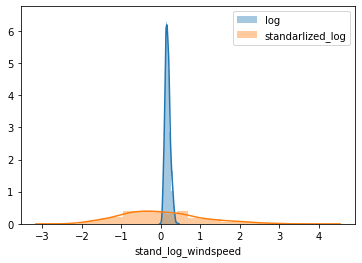

In [34]:
sns.distplot(df.log_windspeed, label='log')
sns.distplot(df.stand_log_windspeed, label='standarlized_log')
plt.legend()

# Building Linear Regression Models!

In [1]:
# import the modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

In [33]:
df = pd.read_csv('day.csv')
df = df[['season', 'temp','hum','windspeed','cnt']]
df.head()

,season,temp,hum,windspeed,cnt
0,1,0.344167,0.805833,0.160446,985
1,1,0.363478,0.696087,0.248539,801
2,1,0.196364,0.437273,0.248309,1349
3,1,0.200000,0.590435,0.160296,1562
4,1,0.226957,0.436957,0.186900,1600


In [35]:
# compare different simple models
formulas = ['cnt ~ temp', 'cnt ~ hum', 'cnt ~ windspeed']
for formula in formulas:
    result = smf.ols(formula, data=df).fit()
    print(formula, result.rsquared, result.pvalues[1])

cnt ~ temp 0.3937487313729241 2.8106223975900516e-81
cnt ~ hum 0.01013214613151936 0.0064541433254371085
cnt ~ windspeed 0.05501135581553118 1.3599586778864865e-10


In [37]:
# different seasons effect with different simple models
seasons = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

for season in range(1,5):
    print("--"* 20)
    print("season {}".format(seasons[season]))
    for variable in ['temp', 'hum', 'windspeed']:
        formula = "cnt ~ {}".format(variable)
        res = smf.ols(formula, data = df[df.season == season]).fit()
#        print("- R^2 for {}: {:.2f}".format(variable, res.rsquared))
        print("- p value for {}: {:.2f}".format(variable, res.pvalues[1]))

----------------------------------------
season spring
- p value for temp: 0.00
- p value for hum: 0.60
- p value for windspeed: 0.24
----------------------------------------
season summer
- p value for temp: 0.00
- p value for hum: 0.00
- p value for windspeed: 0.00
----------------------------------------
season fall
- p value for temp: 0.65
- p value for hum: 0.00
- p value for windspeed: 0.01
----------------------------------------
season winter
- p value for temp: 0.00
- p value for hum: 0.00
- p value for windspeed: 0.05


In [38]:
# one feature model VS. 3 features model
res_1 = smf.ols('cnt ~ temp', data = df).fit()
res_2 = smf.ols('cnt ~ temp + windspeed + hum', data = df).fit()
print(res_1.summary(),res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           2.81e-81
Time:                        19:07:51   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1214.6421    161.164      7.537      0.0

In [39]:
# 4 features model
res = smf.ols('cnt ~ temp + windspeed + hum + season', data = df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     187.6
Date:                Sat, 12 Feb 2022   Prob (F-statistic):          2.29e-110
Time:                        19:15:02   Log-Likelihood:                -6310.2
No. Observations:                 731   AIC:                         1.263e+04
Df Residuals:                     726   BIC:                         1.265e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3512.0294    330.061     10.641      0.000    2864.042    4160.017
temp        5886.6897    293.695     20.044      0.000    5310.098    6463.282
windspeed  -3915.9181    685.815     -5.710      0.000   -5262.335   -2569.501
hum        -3522.6473    370.437     -9.509      0.000   -4249.903   -2795.392
season       414.1348     49.507      8.365      0.000     316.941     511.329
==============================================================================
Omnibus:                        7.484   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                5.311
Skew:                           0.066   Prob(JB):                       0.0703
Kurtosis:                       2.604   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
res = smf.ols('cnt ~ temp + windspeed + hum', data = df).fit()
from statsmodels.stats.stattools import jarque_bera
jarque_bera(res.resid)[1]
# Normally distributed test for residuals

0.016462167613792864

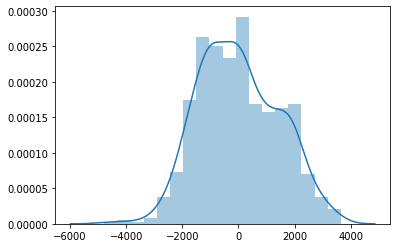

In [54]:
sns.distplot(res.resid)

In [58]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(res.resid, axis = 0)
# Non correlated test for residuals

0.40427705958564947

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# VIF for temp
vif(df[['temp', 'hum', 'windspeed']].values,0)
# Multicollinearity ( > 5 )

7.12172769807716

In [64]:
# polynomial
df['hum2'] = df.hum**2
df['temp2'] = df.temp**2
df['windspeed2'] = df.windspeed**2
res_m1 = smf.ols('cnt ~ temp + temp2 + windspeed + hum', data = df).fit()
res_m2 = smf.ols('cnt ~ temp + windspeed + hum + hum2', data = df).fit()
res_m3 = smf.ols('cnt ~ temp + windspeed + windspeed2 + hum', data = df).fit()
print(res_m1.summary(),res_m2.summary(),res_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     232.2
Date:                Sat, 12 Feb 2022   Prob (F-statistic):          2.60e-128
Time:                        20:09:18   Log-Likelihood:                -6268.5
No. Observations:                 731   AIC:                         1.255e+04
Df Residuals:                     726   BIC:                         1.257e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    774.5147    398.677      1.943      0.0

# Building Generalized Linear Models! （logistic regression）

 **<font color=green>auto-mpg example</font>**

In [65]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [66]:
# origin categories
origins = {1: 'American', 2: 'European', 3: 'Japanese'}
df['origin'] = df.origin.apply(lambda o : origins[o] )
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,American,ford torino


In [67]:
#  dummify the origin variable to create three new binary categorical variables
df = df.merge(pd.get_dummies(df.origin), left_index=True, right_index= True )
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,American,European,Japanese
0,18.0,8,307.0,130.0,3504.0,12.0,70,American,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,American,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,American,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,American,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,American,ford torino,1,0,0


In [71]:
M_US0 = 'American ~ mpg + cylinders + displacement + horsepower + weight + acceleration'
res_US0 = smf.logit(M_US0, data = df).fit()
M_US1 = 'American ~ cylinders + displacement + weight'
res_US1 = smf.logit(M_US1, data = df).fit()
print(res_US0.summary(),res_US1.summary())

Optimization terminated successfully.
         Current function value: 0.253958
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.263467
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               American   No. Observations:                  392
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Feb 2022   Pseudo R-squ.:                  0.6161
Time:                        11:36:48   Log-Likelihood:                -99.551
converged:                       True   LL-Null:                       -259.33
Covariance Type:            nonrobust   LLR p-value:                 5.240e-66
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
I

(array([ 21.,  32.,  27.,  28.,   9.,  19.,  10.,   4.,   7.,   6.,   4.,
          9.,   2.,   4.,   7.,   6.,   7.,   6.,  14., 170.]),
 array([0.01278378, 0.06214459, 0.1115054 , 0.16086621, 0.21022702,
        0.25958783, 0.30894865, 0.35830946, 0.40767027, 0.45703108,
        0.50639189, 0.5557527 , 0.60511351, 0.65447432, 0.70383513,
        0.75319594, 0.80255676, 0.85191757, 0.90127838, 0.95063919,
        1.        ]),
 <a list of 20 Patch objects>)

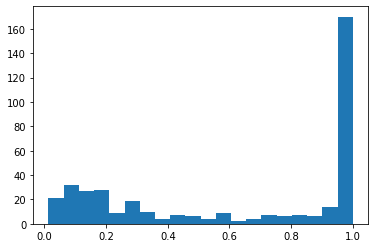

In [73]:
# Calculate the classification probabilities
yhat = res_US1.predict(df)
plt.hist(yhat, bins = 20)

In [78]:
# the confusion matrix for the model  
print(df.American.value_counts())
print(res_US1.pred_table())

1    245
0    147
Name: American, dtype: int64
[[132.  15.]
 [ 30. 215.]]


 **<font color=green>Titanic data example</font>**

In [143]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [127]:
formula = 'survived ~ age + pclass + fare + sibsp + parch'
res_survived = smf.logit(formula, data = df).fit()
print(res_survived.summary(), smf.logit('survived ~ fare', data = df).fit().summary())

Optimization terminated successfully.
         Current function value: 0.590430
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.632275
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1039
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Feb 2022   Pseudo R-squ.:                  0.1270
Time:                        14:23:15   Log-Likelihood:                -617.00
converged:                       True   LL-Null:                       -706.79
Covariance Type:            nonrobust   LLR p-value:                 6.602e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

In [136]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [102]:
# models choice (polynomial / degree)
df['fare2'] = df.fare**2
df['fare3'] = df.fare**3
df['fare4'] = df.fare**4
M1 = 'survived ~ fare'
M2 = 'survived ~ fare + fare2'
M3 = 'survived ~ fare + fare2 + fare3'
M4 = 'survived ~ fare + fare2 + fare3 + fare4'

import statsmodels.formula.api as smf
# polynomial regression
res_M1 = smf.logit(M1, df).fit()
res_M2 = smf.logit(M2, df).fit()
res_M3 = smf.logit(M3, df).fit()
res_M4 = smf.logit(M4, df).fit()

Optimization terminated successfully.
         Current function value: 0.632275
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.627349
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617332
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.617324
         Iterations 11


In [104]:
for res in [res_M1, res_M2, res_M3, res_M4]:
    print("- R^2 : ", res.prsquared)
    print("- p value : ", [res.pvalues])

- R^2 :  0.04944052996136272
- p value :  [Intercept    1.534701e-31
fare         8.366087e-15
dtype: float64]
- R^2 :  0.056846959723801715
- p value :  [Intercept    1.522648e-33
fare         2.869856e-15
fare2        7.296109e-06
dtype: float64]
- R^2 :  0.0719065279554355
- p value :  [Intercept    3.404919e-29
fare         3.104938e-10
fare2        2.779536e-04
fare3        7.980985e-03
dtype: float64]
- R^2 :  0.07191781125147756
- p value :  [Intercept    2.329416e-18
fare         3.164370e-04
fare2        1.804003e-01
fare3        6.023948e-01
fare4        8.885719e-01
dtype: float64]


In [105]:
# the confusion matrix for the model  
for res in [res_M1, res_M2, res_M3]:
    print(res.pred_table())

[[759.  49.]
 [393. 107.]]
[[740.  68.]
 [374. 126.]]
[[697. 111.]
 [327. 173.]]


In [137]:
# add two col (fare degrees) to dataframe 
df['fare2'] = df.fare**2
df['fare3'] = df.fare**3

# models compare (polynomial VS. more features)
M1 = 'survived ~ fare + fare2 + fare3'
M2 = 'survived ~ age + pclass + fare + sibsp + parch'
M3 = 'survived ~ age + pclass + fare + sibsp + parch + C(sex)'

# condition: no missing values
cond = ~df.age.isna() &  ~df.fare.isna()
df = df[cond].copy()
print(f"There are {df.shape[0]} remaining samples")

for formula in [M1, M2, M3]:
    result = smf.logit(formula, data=df).fit()
    m = result.pred_table()
    print("Accuracy: {:.2f} ".format(( m[0][0] + m[1][1] ) / 1045 * 100.0 ))

There are 1045 remaining samples
Optimization terminated successfully.
         Current function value: 0.626385
         Iterations 8
Accuracy: 65.84 
Optimization terminated successfully.
         Current function value: 0.590430
         Iterations 5
Accuracy: 69.28 
Optimization terminated successfully.
         Current function value: 0.464293
         Iterations 6
Accuracy: 78.66 


In [144]:
M1 =  'survived ~ C(pclass)'
result = smf.logit(M1, data=df).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.616218
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1306
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Feb 2022   Pseudo R-squ.:                 0.07339
Time:                        15:55:22   Log-Likelihood:                -806.63
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                 1.803e-28
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4861      0.115      4.242      0.000       0.262       0.711
C(pclass)[T.2]    -0.7696      0.167     -4.611      0.000      -1.097      -0.442
C(pclass)[T.3]    -1.5567      0.143    -10.860      0.000      -1.838      -1.276
==================================================================================
"""

In [149]:
def log_odds(x):
    return np.log(x / (1-x))
df.groupby(by = 'pclass').mean().reset_index()['survived']

0    0.619195
1    0.429603
2    0.255289
Name: survived, dtype: float64

In [150]:
log_odds(0.619195), log_odds(0.429603) - 0.486, log_odds(0.255289) - 0.486

(0.4861328142244046, -0.7694710832087188, -1.5565999869018938)

In [153]:
# ANOVA (LM) + POST-HOC TESTING
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
# ANOVA: H0: mu_0 = mu_1 = ... = mu_n
mc = MultiComparison(df.survived, df.pclass)
results = mc.tukeyhsd()
print(results)
# Tukey's HSD, compare each pairs of mu: 
# eg. mu_1 = mu_2, mu_1 = mu_2, mu_2 = mu_3 (survived in different pclass)?

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -0.1896 0.001 -0.2784 -0.1008   True
     1      3  -0.3639 0.001 -0.4367 -0.2911   True
     2      3  -0.1743 0.001 -0.2511 -0.0975   True
---------------------------------------------------


# Predictive Models

In [7]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

 **<font color=green>Titanic data</font>**

In [3]:
df = pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
M = 'survived ~ pclass + sex + sibsp + parch + fare + C(embarked)'
columns = ['survived', 'pclass','sex','sibsp','parch','fare','embarked']
df = df.dropna(subset = columns)
print("mean fare: {:.2f}".format(df.fare.mean()))
print(df[df.fare > 512])
# fare outliers

mean fare: 33.22
     pclass  survived                                               name  \
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
183       1         1                             Lesurer, Mr. Gustave J   
302       1         1                                   Ward, Miss. Anna   

        sex   age  sibsp  parch    ticket      fare        cabin embarked  \
49     male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
50   female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
183    male  35.0      0      0  PC 17755  512.3292         B101        C   
302  female  35.0      0      0  PC 17755  512.3292          NaN        C   

    boat  body                                       home.dest  
49     3   NaN  Austria-Hungary / Germantown, Philadelphia, PA  
50     3   NaN                    Germantown, Philadelphia, PA  
183    3   NaN       

In [10]:
mean_age = df.age.mean()
df.loc[df.age.isna(), 'age'] = mean_age

# define model
M = 'survived ~ age + pclass + sex + sibsp + parch + fare + C(embarked) '

# split data set into 4 parts, 3/4 train set, 1/4 test set, cross-validation
K = 4
indexes = np.array_split(list(df.index),K)
scores = []
for n in range(K):
    # select test and train subsets
    test_index = indexes[n]
    train_index = [idx for idx in list(df.index) if idx not in test_index]
    train = df.loc[df.index.isin(train_index)]
    test = df.loc[~df.index.isin(train_index)]
    # train the model
    results = smf.logit(M, train).fit()
    yhat = results.predict(test)
    # record the results
    scores.append({
        'n': n,
        'AUC_test': roc_auc_score(test['survived'], yhat),
        'AUC_train':roc_auc_score(train['survived'], results.predict(train))
    })

scores = pd.DataFrame(scores)
scores.mean()

Optimization terminated successfully.
         Current function value: 0.462237
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.471331
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.430710
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454228
         Iterations 6


n            1.500000
AUC_test     0.787840
AUC_train    0.842504
dtype: float64

In [11]:
scores

,n,AUC_test,AUC_train
0,0,0.822531,0.813798
1,1,0.879379,0.828689
2,2,0.689771,0.873773
3,3,0.759681,0.853754


In [13]:
df = pd.read_csv('titanic.csv')
columns = ['survived', 'pclass','sex','sibsp','parch','fare','embarked']
df = df.dropna(subset = columns)

# calculate average age for men and women
mean_age_male = df[df.sex == 'male'].age.mean()  # 30.54 
mean_age_female = df[df.sex == 'female'].age.mean() # 28.58

# and replace mssing values
df.loc[df.age.isna() & (df.sex == 'male'), 'age'] = mean_age_male
df.loc[df.age.isna() & (df.sex == 'female'), 'age'] = mean_age_female

# split data set into 4 parts, 3/4 train set, 1/4 test set, cross-validation
K = 4
indexes = np.array_split(list(df.index),K)
scores = []
for n in range(K):
    # select test and train subsets
    test_index = indexes[n]
    train_index = [idx for idx in list(df.index) if idx not in test_index]
    train = df.loc[df.index.isin(train_index)]
    test = df.loc[~df.index.isin(train_index)]
    # train the model
    results = smf.logit(M, train).fit()
    yhat = results.predict(test)
    # record the results
    scores.append({
        'n': n,
        'AUC_test': roc_auc_score(test['survived'], yhat),
        'AUC_train':roc_auc_score(train['survived'], results.predict(train))
    })

scores = pd.DataFrame(scores)
scores.mean()

Optimization terminated successfully.
         Current function value: 0.462164
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.471156
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.430617
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454334
         Iterations 6


n            1.500000
AUC_test     0.787981
AUC_train    0.842622
dtype: float64

 **<font color=green>credit_default data</font>**

In [21]:
df = pd.read_csv('credit_default.csv')
# Convert Yes No to 1/0
df.loc[df['default'] == 'No', 'default'] = 0
df.loc[df['default'] == 'Yes', 'default'] = 1
df.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [22]:
# Fit a logistic regression model
results = smf.logit('default ~ student + balance + income', df).fit()
yhat = results.predict(df)
from sklearn.metrics import confusion_matrix
confusion_matrix(df['default'], yhat > 0.5)

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


array([[9627,   40],
       [ 228,  105]], dtype=int64)

In [23]:
confusion_matrix(df['default'], yhat > 0.8)

array([[9663,    4],
       [ 303,   30]], dtype=int64)

In [24]:
confusion_matrix(df['default'], yhat > 0.2)

array([[9390,  277],
       [ 130,  203]], dtype=int64)

 **<font color=green>ozone data</font>**

In [32]:
df = pd.read_csv('ozone.csv')
df = df.dropna().rename(columns = {'Solar.R': 'Solar'})
df['Wind2'] = np.square(df['Wind'])
df['Temp2'] = np.square(df['Temp'])
def RMSE(resid):
    return np.sqrt(np.square(resid).sum()) / len(resid)
formulas = ['Ozone ~ Temp',
'Ozone ~ Temp + Temp2',
'Ozone ~ Wind',
'Ozone ~ Wind + Wind2',
'Ozone ~ Temp + Wind + Solar',
'Ozone ~ Temp + Temp2 + Wind + Wind2 + Solar'
]
scores = []
for formula in formulas:
    results = smf.ols(formula, df).fit()
    scores.append( { 'model': formula,
        'RMSE':RMSE(results.resid),
        'R-squared': results.rsquared} 
    )

scores = pd.DataFrame(scores)
print(scores.sort_values(by = 'RMSE').reset_index(drop = True))

                                         model      RMSE  R-squared
0  Ozone ~ Temp + Temp2 + Wind + Wind2 + Solar  1.686430   0.712308
1                  Ozone ~ Temp + Wind + Solar  1.973832   0.605895
2                         Ozone ~ Temp + Temp2  2.126373   0.542627
3                         Ozone ~ Wind + Wind2  2.211034   0.505481
4                                 Ozone ~ Temp  2.249862   0.487960
5                                 Ozone ~ Wind  2.485371   0.375152


In [35]:
# Cross validation
# take a random sample of 70% of the dataframe
np.random.seed(88)
train_index = df.sample(frac = 0.7).index
# create the train and test subset
train = df.loc[df.index.isin(train_index)]
test = df.loc[~df.index.isin(train_index)]
scores = []
for formula in formulas:
    results = smf.ols(formula, train).fit()
    yhat = results.predict(test)
    resid_test = yhat - test.Ozone
    scores.append( { 'model': formula,
        'RMSE_test':RMSE(resid_test),
        'RMSE_train':RMSE(results.resid),
        'R-squared': results.rsquared} 
    )

scores = pd.DataFrame(scores)
print(scores.sort_values(by = 'RMSE_test').reset_index(drop = True))

                                         model  RMSE_test  RMSE_train  \
0  Ozone ~ Temp + Temp2 + Wind + Wind2 + Solar   2.390978    2.191255   
1                         Ozone ~ Temp + Temp2   2.860074    2.775898   
2                                 Ozone ~ Temp   3.329456    2.879278   
3                  Ozone ~ Temp + Wind + Solar   3.554704    2.394652   
4                         Ozone ~ Wind + Wind2   3.611953    2.756357   
5                                 Ozone ~ Wind   4.527407    2.973964   

   R-squared  
0   0.656510  
1   0.448767  
2   0.406944  
3   0.589784  
4   0.456500  
5   0.367297  


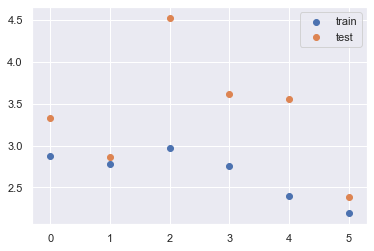

In [38]:
plt.scatter(scores.index, scores.RMSE_train, label='train')
plt.scatter(scores.index, scores.RMSE_test, label='test')
plt.legend()

In [39]:
# K fold cross-validation
K = 4
np.random.seed(8)
df = df.sample(frac = 1)
indexes = np.array_split(list(df.index),K)

scores = []

for formula in formulas:
    for i in range(K):
        test_index  = indexes[i]
        train_index = [idx for idx in list(df.index) if idx not in test_index]
        train = df.loc[df.index.isin(train_index)]
        test  = df.loc[~df.index.isin(train_index)]
    
        results = smf.ols(formula, train).fit()
        yhat    = results.predict(test)
        resid_test = yhat - test.Ozone
    
        scores.append( {
            'model': formula,
            'RMSE_test':RMSE(resid_test),
            'RMSE_train':RMSE(results.resid)
        })

scores = pd.DataFrame(scores)
scores = scores.groupby(by = 'model').mean().reset_index()
scores

,model,RMSE_test,RMSE_train
0,Ozone ~ Temp,4.455087,2.572601
1,Ozone ~ Temp + Temp2,4.141696,2.420512
2,Ozone ~ Temp + Temp2 + Wind + Wind2 + Solar,3.753608,1.897806
3,Ozone ~ Temp + Wind + Solar,4.111439,2.245669
4,Ozone ~ Wind,5.178205,2.843671
5,Ozone ~ Wind + Wind2,4.693273,2.526514


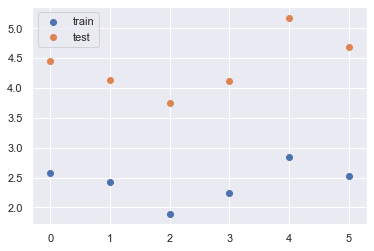

In [40]:
plt.scatter(scores.index, scores.RMSE_train, label='train')
plt.scatter(scores.index, scores.RMSE_test, label='test')
plt.legend()

 **<font color=green>credit_default_sampled data</font>**

In [75]:
df = pd.read_csv('credit_default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [48]:
df.loc[df.default == 'Yes', 'default'] = 1
df.loc[df.default == 'No', 'default'] = 0
df.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [49]:
df.default.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [50]:
result = smf.logit('default ~ income + balance + student', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [51]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:                  0.4619
Time:                        13:16:32   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student[T.Yes]    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
income          3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance            0.0057      0.000     24.737      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [52]:
result.pred_table()

array([[9627.,   40.],
       [ 228.,  105.]])

In [53]:
result.pred_table(threshold = 0.75)

array([[9.658e+03, 9.000e+00],
       [2.930e+02, 4.000e+01]])

In [54]:
result.pred_table(threshold = 0.25)

array([[9477.,  190.],
       [ 149.,  184.]])

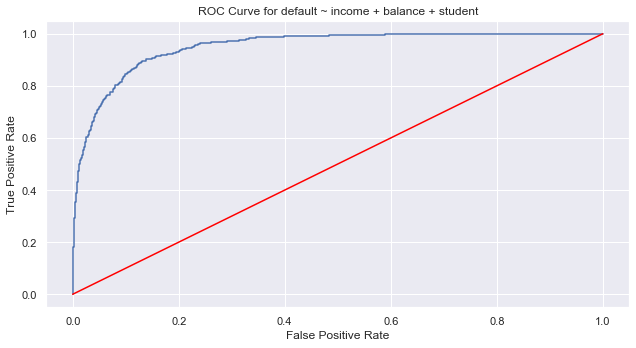

In [60]:
from sklearn.metrics import roc_curve, auc
yhat= result.predict()
false_positive_rate, true_positive_rate, thresholds = roc_curve(df['default'], yhat)

fig, ax = plt.subplots(1, 1, figsize = (9,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], [0,1], color = 'red', linestyle = '-')
plt.title('ROC Curve for default ~ income + balance + student')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df.default, yhat)

0.9495581233452343

In [78]:
df = pd.read_csv('credit_default_sampled.csv')
df.default.value_counts()

0    500
1    333
Name: default, dtype: int64

In [77]:
result = smf.logit('default ~ income + balance + student', data = df).fit()
yhat= result.predict()
roc_auc_score(df.default, yhat)

Optimization terminated successfully.
         Current function value: 0.245965
         Iterations 8


0.9616516516516517